#DATA PREPARATION

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset from spreadsheet

sheet_url = 'https://docs.google.com/spreadsheets/d/1iC3pO19yrr9Vc_j_1_JTOHrVfdSrLxSTluPIvGo3Mhk/edit#gid=522792679'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(sheet_url_replace)

In [ ]:
#Mengubah tipe data
df['discounted_price'] = df['discounted_price'].str.replace("₹", '')
df['discounted_price'] = df['discounted_price'].str.replace(",", '')
df['discounted_price'] = df['discounted_price'].astype('float64')
df['discounted_price'] = round(df['discounted_price'], 3)

df['actual_price'] = df['actual_price'].str.replace("₹", '')
df['actual_price'] = df['actual_price'].str.replace(",", '')
df['actual_price'] = df['actual_price'].astype('float64')

df['actual_price'] = round(df['actual_price'], 3)

df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

df['rating_count'] = round(df['rating_count'], 3)

<ipython-input-5-4e6b87344bd2>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')


In [ ]:
#split kolom category
df['main_category'] = df['category'].astype(str).str.split('|').str[0]
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]

#WHY 1

**Mengapa perlu menganalisis total penjualan dari produk kategori di Amazon India? variable: produk kategori terhadap count penjualan**

**Root Cause 1:** Karena terdapat variasi data penjualan dari beberapa kategori produk di Amazon India.

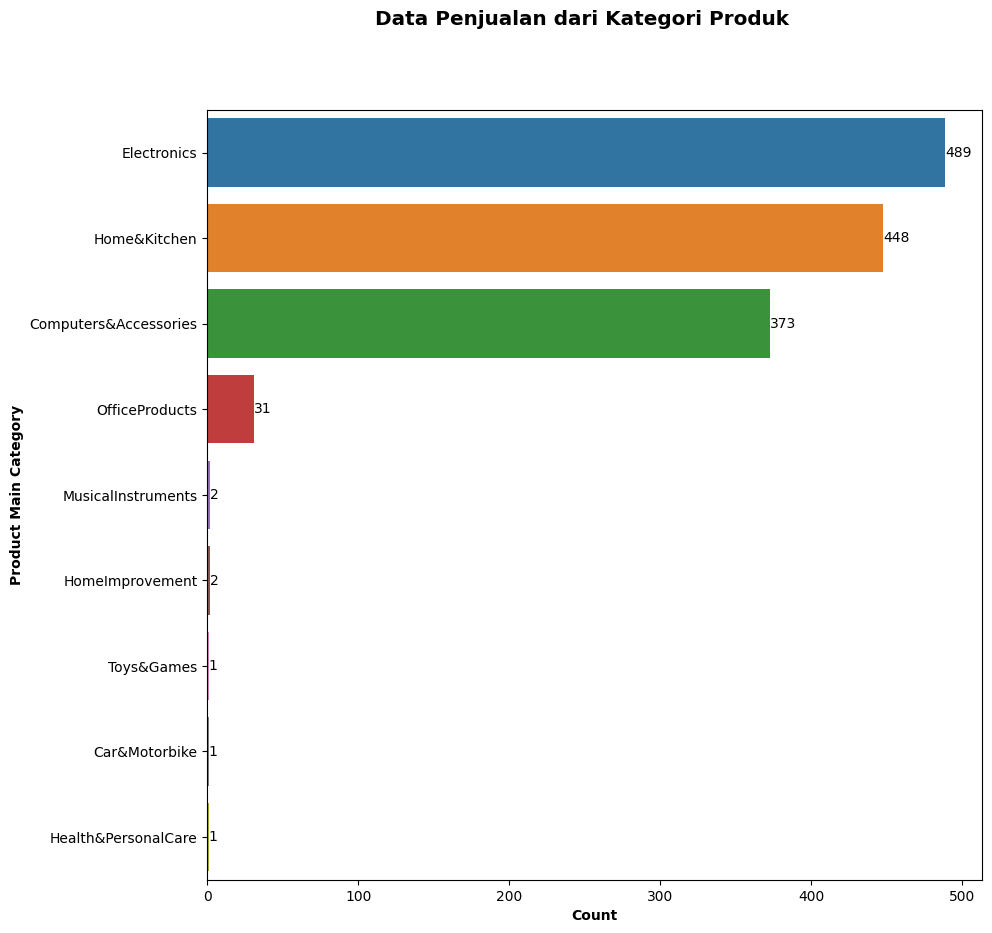

In [ ]:
top_main_categories = df['main_category'].value_counts().reset_index()
top_main_categories.columns = ['main_category', 'counts']

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Data Penjualan dari Kategori Produk', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=top_main_categories, x='counts', y='main_category')

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Pada data tersebut kategori **Electronics** memiliki penjualan tertinggi sedangkan kategori dengan penjualan terendah yaitu **MusicalInstruments, HomeImprovement, Toys&Games, Car&Motorbike, Health&PersonalCare**

#WHY2

**Mengapa perlu memperhatikan harga sebelum diskon dan persentase diskon dari produk kategori Toys&Games**

**Root Cause 2:** Karena penjualan produk kategori Toys & Games paling sedikit penjualannya di antara produk kategori lainnya.

#Variabel: Produk kategori terhadap harga

In [ ]:
#Rata-rata harga per kategori
average_price_per_category = df.groupby('main_category')['actual_price'].mean()
average_price_per_category_rounded = average_price_per_category.round(1).sort_values(ascending=False)

print("Rata-rata Harga per Kategori:")
print(average_price_per_category_rounded)

Rata-rata Harga per Kategori:
main_category
Electronics              10427.1
Home&Kitchen              4162.1
Car&Motorbike             4000.0
Health&PersonalCare       1900.0
Computers&Accessories     1862.4
MusicalInstruments        1347.0
HomeImprovement            799.0
OfficeProducts             397.2
Toys&Games                 150.0
Name: actual_price, dtype: float64


In [ ]:
# Jumlah harga per kategori
total_price_per_category = df.groupby('main_category')['actual_price'].sum()
total_price_per_category_rounded = total_price_per_category.round(1).sort_values(ascending=False)

print("Total Harga per Kategori:")
print(total_price_per_category_rounded)

Total Harga per Kategori:
main_category
Electronics              5098862.0
Home&Kitchen             1864609.0
Computers&Accessories     694657.0
OfficeProducts             12313.0
Car&Motorbike               4000.0
MusicalInstruments          2694.0
Health&PersonalCare         1900.0
HomeImprovement             1598.0
Toys&Games                   150.0
Name: actual_price, dtype: float64


In [ ]:
#Harga tertinggi dan terendah dari tiap kategori
max_min_categories = df.groupby('main_category')['actual_price'].agg(['max', 'min'])
max_min_categories = max_min_categories.sort_values(by='max', ascending=False).round(1)
max_min_categories

,max,min
main_category,,
Electronics,139900.0,171.0
Home&Kitchen,75990.0,79.0
Computers&Accessories,59890.0,39.0
Car&Motorbike,4000.0,4000.0
OfficeProducts,2999.0,50.0
MusicalInstruments,1995.0,699.0
Health&PersonalCare,1900.0,1900.0
HomeImprovement,999.0,599.0
Toys&Games,150.0,150.0


In [ ]:
#Harga termahal dan termurah dari produk di kategori elektronik
electronics_df = df[df['main_category'] == 'Electronics']

expensive = electronics_df.nlargest(3, 'actual_price')
cheap = electronics_df.nsmallest(3, 'actual_price')

print("3 produk termahal dari kategori elektronik:")
for index, row in expensive.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

print("\n3 produk termurah dari kategori elektronik:")
for index, row in cheap.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

3 produk termahal dari kategori elektronik:
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black): = 139900.0
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey): = 85000.0
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black): = 79990.0

3 produk termurah dari kategori elektronik:
Goldmedal Curve Plus 202042 Plastic Spice 3-Pin 240V Universal Travel Adaptor (White): = 171.0
Eveready 1015 Carbon Zinc AA Battery - 10 Pieces: = 180.0
Eveready Red 1012 AAA Batteries - Pack of 10: = 180.0


In [ ]:
#Harga termahal dan termurah dari produk di kategori Home&Kitchen
home_kitchen_df = df[df['main_category'] == 'Home&Kitchen']

expensive = home_kitchen_df.nlargest(3, 'actual_price')
cheap = home_kitchen_df.nsmallest(3, 'actual_price')

print("3 produk termahal dari kategori home & kitchen:")
for index, row in expensive.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

print("\n3 produk termurah dari kategori home & kitchen:")
for index, row in cheap.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

3 produk termahal dari kategori home & kitchen:
LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protection, 2022 Model, PS-Q19YNZE, White): = 75990.0
Coway Professional Air Purifier for Home, Longest Filter Life 8500 Hrs, Green True HEPA Filter, Traps 99.99% Virus & PM 0.1 Particles, Warranty 7 Years (AirMega 150 (AP-1019C)): = 59900.0
ECOVACS DEEBOT N8 2-in-1 Robotic Vacuum Cleaner, 2022 New Launch, Most Powerful Suction, Covers 2000+ Sq. Ft in One Charge, Advanced dToF Technology with OZMO Mopping (DEEBOT N8) - White: = 59900.0

3 produk termurah dari kategori home & kitchen:
Kitchenwell 18Pc Plastic Food Snack Bag Pouch Clip Sealer for Keeping Food Fresh for Home, Kitchen, Camping Snack Seal Sealing Bag Clips (Multi-Color) | (Pack of 18)|: = 79.0
VR 18 Pcs - 3 Different Size Plastic Food Snack Bag Pouch Clip Sealer Large, Medium, Small Plastic Snack Seal Sealing Bag Clips Vacuum Sealer (Set of 18, Multi-Color) (Multico

In [ ]:
#Harga termahal dan termurah dari produk di kategori Computers & Accessories
computers_accessories_df = df[df['main_category'] == 'Computers&Accessories']

expensive = computers_accessories_df.nlargest(3, 'actual_price')
cheap = computers_accessories_df.nsmallest(3, 'actual_price')

print("3 produk termahal dari kategori Computers & Accessories:")
for index, row in expensive.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

print("\n3 produk termurah dari kategori Computers & Accessories:")
for index, row in cheap.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

3 produk termahal dari kategori Computers & Accessories:
Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" FHD Thin & Light Laptop(8GB/512GB SSD/Windows 11/Office 2021/2Yr Warranty/3months Xbox Game Pass/Platinum Grey/1.7Kg), 81X800LGIN: = 59890.0
Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz Refresh Rate| 6GB, 128GB| 2.5K+ Display (10.95-inch/27.81cm)|1 Billion Colours| Dolby Vision Atmos| Quad Speakers| Wi-Fi| Gray: = 37999.0
SanDisk 1TB Extreme Portable SSD 1050MB/s R, 1000MB/s W,Upto 2 Meter Drop Protection with IP55 Water/dust Resistance, HW Encryption, PC,MAC & TypeC Smartphone Compatible, 5Y Warranty, External SSD: = 32000.0

3 produk termurah dari kategori Computers & Accessories:
E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1): = 39.0
Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary): = 39.0
E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colors May Vary, Small) - Set of 2 Pieces: = 59.0


In [ ]:
#Harga termahal dan termurah dari produk di kategori OfficeProducts
OfficeProducts_df = df[df['main_category'] == 'OfficeProducts']

expensive = OfficeProducts_df.nlargest(3, 'actual_price')
cheap = OfficeProducts_df.nsmallest(3, 'actual_price')

print("3 produk termahal dari kategori OfficeProducts:")
for index, row in expensive.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

print("\n3 produk termurah dari kategori OfficeProducts:")
for index, row in cheap.iterrows():
    print(f"{row['product_name']}: = {row['actual_price']}")

3 produk termahal dari kategori OfficeProducts:
Portronics Ruffpad 15 Re-Writable LCD Screen 38.1cm (15-inch) Writing Pad for Drawing, Playing, Handwriting Gifts for Kids & Adults (Grey): = 2999.0
Casio FX-991ES Plus-2nd Edition Scientific Calculator, Black: = 1295.0
COI Note Pad/Memo Book with Sticky Notes & Clip Holder with Pen for Gifting: = 800.0

3 produk termurah dari kategori OfficeProducts:
Classmate Octane Neon- Blue Gel Pens(Pack of 5)|Smooth Writing Pen|Attractive body colour for Boys & Girls|Waterproof ink for smudge free writing|Preferred by Students for Exam|Study at home essential: = 50.0
Classmate Pulse Spiral Notebook - 240 mm x 180 mm, Soft Cover, 200 Pages, Unruled: = 75.0
BRUSTRO Copytinta Coloured Craft Paper A4 Size 80 GSM Mixed Bright Colour 40 Sheets Pack (10 cols X 4 Sheets) Double Side Color for Office Printing, Art and Craft.: = 99.0


In [ ]:
#Daftar harga dari produk di kategori Car & Motorbike
car_motorbike_df = df[df['main_category'] == 'Car&Motorbike']

print("Daftar harga produk pada kategori Car & Motorbike:")
for index, row in car_motorbike_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']}")

Daftar harga produk pada kategori Car & Motorbike:
Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black: 4000.0


In [ ]:
#Harga termahal dan termurah dari produk di kategori MusicalInstruments
MusicalInstruments_df = df[df['main_category'] == 'MusicalInstruments']

print("Daftar harga produk pada kategori MusicalInstruments:")
for index, row in MusicalInstruments_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']}")

Daftar harga produk pada kategori MusicalInstruments:
Boya ByM1 Auxiliary Omnidirectional Lavalier Condenser Microphone with 20ft Audio Cable (Black): 1995.0
MAONO AU-400 Lavalier Auxiliary Omnidirectional Microphone (Black): 699.0


In [ ]:
#Daftar harga dari produk di kategori Health&PersonalCare
Health_PersonalCare_df = df[df['main_category'] == 'Health&PersonalCare']

print("Daftar harga produk pada kategori Health&PersonalCare:")
for index, row in Health_PersonalCare_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']}")

Daftar harga produk pada kategori Health&PersonalCare:
Dr Trust Electronic Kitchen Digital Scale Weighing Machine (Blue): 1900.0


In [ ]:
#Harga termahal dan termurah dari produk di kategori HomeImprovement
HomeImprovement_df = df[df['main_category'] == 'HomeImprovement']

print("Daftar harga produk pada kategori HomeImprovement:")
for index, row in HomeImprovement_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']}")

Daftar harga produk pada kategori HomeImprovement:
ESnipe Mart Worldwide Travel Adapter with Build in Dual USB Charger Ports with 125V 6A, 250V Protected Electrical Plug for Laptops, Cameras (White): 999.0
Gizga Essentials Cable Organiser, Cord Management System for PC, TV, Home Theater, Speaker & Cables, Reusable Cable Organizer for Desk, WFH Accessories, Organizer Tape Roll, Reusable Cable Ties Strap: 599.0


In [ ]:
#Daftar harga dari produk di kategori Toys&Games
Toys_Games_df = df[df['main_category'] == 'Toys&Games']

print("Daftar harga produk pada kategori Toys&Games:")
for index, row in Toys_Games_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']}")

Daftar harga produk pada kategori Toys&Games:
Faber-Castell Connector Pen Set - Pack of 25 (Assorted): 150.0


#Variabel: Produk kategori terhadap diskon


In [ ]:
#Rata-rata discount per kategori
average_discount_per_category = df.groupby('main_category')['discount_percentage'].mean()
average_discount_per_category_rounded = average_discount_per_category.round(2).sort_values(ascending=False)

print("Rata-rata Discount per Kategori:")
print(average_discount_per_category_rounded)

Rata-rata Discount per Kategori:
main_category
HomeImprovement          0.57
Computers&Accessories    0.53
Health&PersonalCare      0.53
Electronics              0.50
MusicalInstruments       0.46
Car&Motorbike            0.42
Home&Kitchen             0.40
OfficeProducts           0.12
Toys&Games               0.00
Name: discount_percentage, dtype: float64


In [ ]:
# Filter the DataFrame for Electronics category
electronics_df = df[df['main_category'] == 'Electronics']

# Find the most expensive and cheapest products
expensive = electronics_df.nlargest(3, 'actual_price')
cheap = electronics_df.nsmallest(3, 'actual_price')

# Display all three products for the most expensive and cheapest in the Electronics category
print("\nProduk termahal dari kategori elektronik:")
for index, row in expensive.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")

print("\nProduk termurah dari kategori elektronik:")
for index, row in cheap.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")



Produk termahal dari kategori elektronik:
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black): Harga = 139900.0, Diskon = 0.44
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey): Harga = 85000.0, Diskon = 0.35
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black): Harga = 79990.0, Diskon = 0.4

Produk termurah dari kategori elektronik:
Goldmedal Curve Plus 202042 Plastic Spice 3-Pin 240V Universal Travel Adaptor (White): Harga = 171.0, Diskon = 0.42
Eveready 1015 Carbon Zinc AA Battery - 10 Pieces: Harga = 180.0, Diskon = 0.17
Eveready Red 1012 AAA Batteries - Pack of 10: Harga = 180.0, Diskon = 0.12


In [ ]:
# Filter the DataFrame for Home&Kitchen category
home_kitchen_df = df[df['main_category'] == 'Home&Kitchen']

# Find the most expensive and cheapest products
expensive_home_kitchen = home_kitchen_df.nlargest(3, 'actual_price')
cheap_home_kitchen = home_kitchen_df.nsmallest(3, 'actual_price')

# Display all three products for the most expensive and cheapest in the Home&Kitchen category
print("\nProduk termahal dari kategori Home&Kitchen:")
for index, row in expensive_home_kitchen.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")

print("\nProduk termurah dari kategori Home&Kitchen:")
for index, row in cheap_home_kitchen.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")



Produk termahal dari kategori Home&Kitchen:
LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protection, 2022 Model, PS-Q19YNZE, White): Harga = 75990.0, Diskon = 0.43
Coway Professional Air Purifier for Home, Longest Filter Life 8500 Hrs, Green True HEPA Filter, Traps 99.99% Virus & PM 0.1 Particles, Warranty 7 Years (AirMega 150 (AP-1019C)): Harga = 59900.0, Diskon = 0.76
ECOVACS DEEBOT N8 2-in-1 Robotic Vacuum Cleaner, 2022 New Launch, Most Powerful Suction, Covers 2000+ Sq. Ft in One Charge, Advanced dToF Technology with OZMO Mopping (DEEBOT N8) - White: Harga = 59900.0, Diskon = 0.53

Produk termurah dari kategori Home&Kitchen:
Kitchenwell 18Pc Plastic Food Snack Bag Pouch Clip Sealer for Keeping Food Fresh for Home, Kitchen, Camping Snack Seal Sealing Bag Clips (Multi-Color) | (Pack of 18)|: Harga = 79.0, Diskon = 0.0
VR 18 Pcs - 3 Different Size Plastic Food Snack Bag Pouch Clip Sealer Large, Medium, Small Plastic 

In [ ]:
# Filter the DataFrame for Computers&Accessories category
computers_accessories_df = df[df['main_category'] == 'Computers&Accessories']

# Find the most expensive and cheapest products
expensive_computers_accessories = computers_accessories_df.nlargest(3, 'actual_price')
cheap_computers_accessories = computers_accessories_df.nsmallest(3, 'actual_price')

# Display all three products for the most expensive and cheapest in the Computers & Accessories category
print("\nProduk termahal dari kategori Computers & Accessories:")
for index, row in expensive_computers_accessories.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")

print("\nProduk termurah dari kategori Computers & Accessories:")
for index, row in cheap_computers_accessories.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")



Produk termahal dari kategori Computers & Accessories:
Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" FHD Thin & Light Laptop(8GB/512GB SSD/Windows 11/Office 2021/2Yr Warranty/3months Xbox Game Pass/Platinum Grey/1.7Kg), 81X800LGIN: Harga = 59890.0, Diskon = 0.38
Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz Refresh Rate| 6GB, 128GB| 2.5K+ Display (10.95-inch/27.81cm)|1 Billion Colours| Dolby Vision Atmos| Quad Speakers| Wi-Fi| Gray: Harga = 37999.0, Diskon = 0.29
SanDisk 1TB Extreme Portable SSD 1050MB/s R, 1000MB/s W,Upto 2 Meter Drop Protection with IP55 Water/dust Resistance, HW Encryption, PC,MAC & TypeC Smartphone Compatible, 5Y Warranty, External SSD: Harga = 32000.0, Diskon = 0.68

Produk termurah dari kategori Computers & Accessories:
E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1): Harga = 39.0, Diskon = 0.0
Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary): Harga = 39.0, Diskon = 0.0
E-COSMOS 5V 1.2W Portable Flexible 

In [ ]:
# Filter the DataFrame for OfficeProducts category
OfficeProducts_df = df[df['main_category'] == 'OfficeProducts']

# Find the most expensive and cheapest products
expensive_office_products = OfficeProducts_df.nlargest(3, 'actual_price')
cheap_office_products = OfficeProducts_df.nsmallest(3, 'actual_price')

# Display all three products for the most expensive and cheapest in the OfficeProducts category
print("\nProduk termahal dari kategori OfficeProducts:")
for index, row in expensive_office_products.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")

print("\nProduk termurah dari kategori OfficeProducts:")
for index, row in cheap_office_products.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Diskon = {row['discount_percentage']}")



Produk termahal dari kategori OfficeProducts:
Portronics Ruffpad 15 Re-Writable LCD Screen 38.1cm (15-inch) Writing Pad for Drawing, Playing, Handwriting Gifts for Kids & Adults (Grey): Harga = 2999.0, Diskon = 0.53
Casio FX-991ES Plus-2nd Edition Scientific Calculator, Black: Harga = 1295.0, Diskon = 0.0
COI Note Pad/Memo Book with Sticky Notes & Clip Holder with Pen for Gifting: Harga = 800.0, Diskon = 0.75

Produk termurah dari kategori OfficeProducts:
Classmate Octane Neon- Blue Gel Pens(Pack of 5)|Smooth Writing Pen|Attractive body colour for Boys & Girls|Waterproof ink for smudge free writing|Preferred by Students for Exam|Study at home essential: Harga = 50.0, Diskon = 0.0
Classmate Pulse Spiral Notebook - 240 mm x 180 mm, Soft Cover, 200 Pages, Unruled: Harga = 75.0, Diskon = 0.11
BRUSTRO Copytinta Coloured Craft Paper A4 Size 80 GSM Mixed Bright Colour 40 Sheets Pack (10 cols X 4 Sheets) Double Side Color for Office Printing, Art and Craft.: Harga = 99.0, Diskon = 0.0


In [ ]:
# Filter the DataFrame for Car&Motorbike category
car_motorbike_df = df[df['main_category'] == 'Car&Motorbike']

# Analisis discount percentages untuk produk di Car & Motorbike category
for index, row in car_motorbike_df.iterrows():
    product_name = row['product_name']
    actual_price = row['actual_price']
    discount_percentage = row['discount_percentage']

    print(f"\nAnalisis Diskon untuk produk {product_name} pada kategori Car & Motorbike:")
    print(f"Harga Asli: {actual_price}")
    print(f"Diskon Percentage: {discount_percentage}")


Analisis Diskon untuk produk Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black pada kategori Car & Motorbike:
Harga Asli: 4000.0
Diskon Percentage: 0.42


In [ ]:
#Harga termahal dan termurah dari produk di kategori MusicalInstruments dan discount
MusicalInstruments_df = df[df['main_category'] == 'MusicalInstruments']

print("Daftar harga produk pada kategori MusicalInstruments:")
for index, row in MusicalInstruments_df.iterrows():
    product_name = row['product_name']
    actual_price = row['actual_price']
    discount_percentage = row['discount_percentage']

    print(f"\nAnalisis Diskon untuk produk {product_name} pada kategori MusicalInstruments:")
    print(f"Harga Asli: {actual_price}")
    print(f"Diskon Percentage: {discount_percentage}")

Daftar harga produk pada kategori MusicalInstruments:

Analisis Diskon untuk produk Boya ByM1 Auxiliary Omnidirectional Lavalier Condenser Microphone with 20ft Audio Cable (Black) pada kategori MusicalInstruments:
Harga Asli: 1995.0
Diskon Percentage: 0.6

Analisis Diskon untuk produk MAONO AU-400 Lavalier Auxiliary Omnidirectional Microphone (Black) pada kategori MusicalInstruments:
Harga Asli: 699.0
Diskon Percentage: 0.32


In [ ]:
#Harga termahal dan termurah dari produk di kategori Health&PersonalCare dan discount
Health_PersonalCare_df = df[df['main_category'] == 'Health&PersonalCare']

print("Daftar harga produk pada kategori Health&PersonalCare:")
for index, row in Health_PersonalCare_df.iterrows():
    product_name = row['product_name']
    actual_price = row['actual_price']
    discount_percentage = row['discount_percentage']

    print(f"\nAnalisis Diskon untuk produk {product_name} pada kategori Health&PersonalCare:")
    print(f"Harga Asli: {actual_price}")
    print(f"Diskon Percentage: {discount_percentage}")

Daftar harga produk pada kategori Health&PersonalCare:

Analisis Diskon untuk produk Dr Trust Electronic Kitchen Digital Scale Weighing Machine (Blue) pada kategori Health&PersonalCare:
Harga Asli: 1900.0
Diskon Percentage: 0.53


In [ ]:
#Harga termahal dan termurah dari produk di kategori HomeImprovement
HomeImprovement_df = df[df['main_category'] == 'HomeImprovement']

print("Daftar harga produk pada kategori HomeImprovement:")
for index, row in HomeImprovement_df.iterrows():
    product_name = row['product_name']
    actual_price = row['actual_price']
    discount_percentage = row['discount_percentage']

    print(f"\nAnalisis Diskon untuk produk {product_name} pada kategori HomeImprovement:")
    print(f"Harga Asli: {actual_price}")
    print(f"Diskon Percentage: {discount_percentage}")

Daftar harga produk pada kategori HomeImprovement:

Analisis Diskon untuk produk ESnipe Mart Worldwide Travel Adapter with Build in Dual USB Charger Ports with 125V 6A, 250V Protected Electrical Plug for Laptops, Cameras (White) pada kategori HomeImprovement:
Harga Asli: 999.0
Diskon Percentage: 0.57

Analisis Diskon untuk produk Gizga Essentials Cable Organiser, Cord Management System for PC, TV, Home Theater, Speaker & Cables, Reusable Cable Organizer for Desk, WFH Accessories, Organizer Tape Roll, Reusable Cable Ties Strap pada kategori HomeImprovement:
Harga Asli: 599.0
Diskon Percentage: 0.58


In [ ]:
#Harga termahal dan termurah dari produk di kategori Toys&Games
Toys_Games_df = df[df['main_category'] == 'Toys&Games']

print("Daftar harga produk pada kategori Toys&Games:")
for index, row in Toys_Games_df.iterrows():
    product_name = row['product_name']
    actual_price = row['actual_price']
    discount_percentage = row['discount_percentage']

    print(f"\nAnalisis Diskon untuk produk {product_name} pada kategori Toys&Games:")
    print(f"Harga Asli: {actual_price}")
    print(f"Diskon Percentage: {discount_percentage}")

Daftar harga produk pada kategori Toys&Games:

Analisis Diskon untuk produk Faber-Castell Connector Pen Set - Pack of 25 (Assorted) pada kategori Toys&Games:
Harga Asli: 150.0
Diskon Percentage: 0.0


#WHY3

**Mengapa perlu menganalisis rating dari produk kategori di Amazon India? Variabel: Produk kategori thd rating**

Root Cause 4: Karena penjualan Toys&Games paling sedikit di antara produk lainnya, meskipun harganya paling murah. **Variabel: Produk kategori terhadap rating**


In [ ]:
#rata-rata rating
rating_main_category = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)
rating_main_category_rounded = rating_main_category.round(2)
print(rating_main_category_rounded)

main_category
OfficeProducts           4.31
Toys&Games               4.30
HomeImprovement          4.25
Computers&Accessories    4.16
Electronics              4.08
Home&Kitchen             4.04
Health&PersonalCare      4.00
MusicalInstruments       3.90
Car&Motorbike            3.80
Name: rating, dtype: float64


In [ ]:
# Filter the DataFrame for Electronics category
electronics_df = df[df['main_category'] == 'Electronics']

# Find the most expensive and cheapest products
expensive_electronics = electronics_df.nlargest(3, 'actual_price')
cheap_electronics = electronics_df.nsmallest(3, 'actual_price')

# Display the most expensive and cheapest products with their ratings
print("Produk termahal dari kategori Electronics:")
for index, row in expensive_electronics.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")

print("\nProduk termurah dari kategori Electronics:")
for index, row in cheap_electronics.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")

Produk termahal dari kategori Electronics:
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black): Harga = 139900.0, Rating = 4.7
VU 164 cm (65 inches) The GloLED Series 4K Smart LED Google TV 65GloLED (Grey): Harga = 85000.0, Rating = 4.3
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black): Harga = 79990.0, Rating = 4.3

Produk termurah dari kategori Electronics:
Goldmedal Curve Plus 202042 Plastic Spice 3-Pin 240V Universal Travel Adaptor (White): Harga = 171.0, Rating = 4.5
Eveready 1015 Carbon Zinc AA Battery - 10 Pieces: Harga = 180.0, Rating = 4.4
Eveready Red 1012 AAA Batteries - Pack of 10: Harga = 180.0, Rating = 4.3


In [ ]:
# Filter the DataFrame for Home&Kitchen category
home_kitchen_df = df[df['main_category'] == 'Home&Kitchen']

# Find the most expensive and cheapest products
expensive_home_kitchen = home_kitchen_df.nlargest(3, 'actual_price')
cheap_home_kitchen = home_kitchen_df.nsmallest(3, 'actual_price')

# Display the most expensive and cheapest products with their ratings
print("Produk termahal dari kategori Home & Kitchen:")
for index, row in expensive_home_kitchen.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")

print("\nProduk termurah dari kategori Home & Kitchen:")
for index, row in cheap_home_kitchen.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")

Produk termahal dari kategori Home & Kitchen:
LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protection, 2022 Model, PS-Q19YNZE, White): Harga = 75990.0, Rating = 4.3
Coway Professional Air Purifier for Home, Longest Filter Life 8500 Hrs, Green True HEPA Filter, Traps 99.99% Virus & PM 0.1 Particles, Warranty 7 Years (AirMega 150 (AP-1019C)): Harga = 59900.0, Rating = 4.4
ECOVACS DEEBOT N8 2-in-1 Robotic Vacuum Cleaner, 2022 New Launch, Most Powerful Suction, Covers 2000+ Sq. Ft in One Charge, Advanced dToF Technology with OZMO Mopping (DEEBOT N8) - White: Harga = 59900.0, Rating = 4.4

Produk termurah dari kategori Home & Kitchen:
Kitchenwell 18Pc Plastic Food Snack Bag Pouch Clip Sealer for Keeping Food Fresh for Home, Kitchen, Camping Snack Seal Sealing Bag Clips (Multi-Color) | (Pack of 18)|: Harga = 79.0, Rating = 4.0
VR 18 Pcs - 3 Different Size Plastic Food Snack Bag Pouch Clip Sealer Large, Medium, Small Plastic 

In [ ]:
# Filter the DataFrame for Computers&Accessories category
computers_accessories_df = df[df['main_category'] == 'Computers&Accessories']

# Find the most expensive and cheapest products
expensive_computers_accessories = computers_accessories_df.nlargest(3, 'actual_price')
cheap_computers_accessories = computers_accessories_df.nsmallest(3, 'actual_price')

# Display the most expensive and cheapest products with their ratings
print("Produk termahal dari kategori Computers & Accessories:")
for index, row in expensive_computers_accessories.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")

print("\nProduk termurah dari kategori Computers & Accessories:")
for index, row in cheap_computers_accessories.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")


Produk termahal dari kategori Computers & Accessories:
Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6" FHD Thin & Light Laptop(8GB/512GB SSD/Windows 11/Office 2021/2Yr Warranty/3months Xbox Game Pass/Platinum Grey/1.7Kg), 81X800LGIN: Harga = 59890.0, Rating = 4.0
Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz Refresh Rate| 6GB, 128GB| 2.5K+ Display (10.95-inch/27.81cm)|1 Billion Colours| Dolby Vision Atmos| Quad Speakers| Wi-Fi| Gray: Harga = 37999.0, Rating = 4.6
SanDisk 1TB Extreme Portable SSD 1050MB/s R, 1000MB/s W,Upto 2 Meter Drop Protection with IP55 Water/dust Resistance, HW Encryption, PC,MAC & TypeC Smartphone Compatible, 5Y Warranty, External SSD: Harga = 32000.0, Rating = 4.4

Produk termurah dari kategori Computers & Accessories:
E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1): Harga = 39.0, Rating = 3.8
Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary): Harga = 39.0, Rating = 3.6
E-COSMOS 5V 1.2W Portable Flexible USB 

In [ ]:
# Filter the DataFrame for OfficeProducts category
OfficeProducts_df = df[df['main_category'] == 'OfficeProducts']

# Find the most expensive and cheapest products
expensive_OfficeProducts = OfficeProducts_df.nlargest(3, 'actual_price')
cheap_OfficeProducts = OfficeProducts_df.nsmallest(3, 'actual_price')

# Display the most expensive and cheapest products with their prices and ratings
print("3 produk termahal dari kategori OfficeProducts:")
for index, row in expensive_OfficeProducts.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")

print("\n3 produk termurah dari kategori OfficeProducts:")
for index, row in cheap_OfficeProducts.iterrows():
    print(f"{row['product_name']}: Harga = {row['actual_price']}, Rating = {row['rating']}")


3 produk termahal dari kategori OfficeProducts:
Portronics Ruffpad 15 Re-Writable LCD Screen 38.1cm (15-inch) Writing Pad for Drawing, Playing, Handwriting Gifts for Kids & Adults (Grey): Harga = 2999.0, Rating = 4.3
Casio FX-991ES Plus-2nd Edition Scientific Calculator, Black: Harga = 1295.0, Rating = 4.5
COI Note Pad/Memo Book with Sticky Notes & Clip Holder with Pen for Gifting: Harga = 800.0, Rating = 4.1

3 produk termurah dari kategori OfficeProducts:
Classmate Octane Neon- Blue Gel Pens(Pack of 5)|Smooth Writing Pen|Attractive body colour for Boys & Girls|Waterproof ink for smudge free writing|Preferred by Students for Exam|Study at home essential: Harga = 50.0, Rating = 4.3
Classmate Pulse Spiral Notebook - 240 mm x 180 mm, Soft Cover, 200 Pages, Unruled: Harga = 75.0, Rating = 4.1
BRUSTRO Copytinta Coloured Craft Paper A4 Size 80 GSM Mixed Bright Colour 40 Sheets Pack (10 cols X 4 Sheets) Double Side Color for Office Printing, Art and Craft.: Harga = 99.0, Rating = 4.3


In [ ]:
#Harga termahal dan termurah dari produk di kategori Car & Motorbike dan rating
car_motorbike_df = df[df['main_category'] == 'Car&Motorbike']

print("Daftar harga produk pada kategori Car & Motorbike:")
for index, row in car_motorbike_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']}, Rating = {row['rating']}")

Daftar harga produk pada kategori Car & Motorbike:
Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black: 4000.0, Rating = 3.8


In [ ]:
#Harga termahal dan termurah dari produk di kategori MusicalInstruments dan rating
MusicalInstruments_df = df[df['main_category'] == 'MusicalInstruments']

print("Daftar harga produk pada kategori MusicalInstruments:")
for index, row in MusicalInstruments_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']},Rating = {row['rating']}")

Daftar harga produk pada kategori MusicalInstruments:
Boya ByM1 Auxiliary Omnidirectional Lavalier Condenser Microphone with 20ft Audio Cable (Black): 1995.0,Rating = 4.0
MAONO AU-400 Lavalier Auxiliary Omnidirectional Microphone (Black): 699.0,Rating = 3.8


In [ ]:
#Harga termahal dan termurah dari produk di kategori Health&PersonalCare dan rating
Health_PersonalCare_df = df[df['main_category'] == 'Health&PersonalCare']

print("Daftar harga produk pada kategori Health&PersonalCare:")
for index, row in Health_PersonalCare_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']} ,Rating = {row['rating']}")

Daftar harga produk pada kategori Health&PersonalCare:
Dr Trust Electronic Kitchen Digital Scale Weighing Machine (Blue): 1900.0 ,Rating = 4.0


In [ ]:
#Harga termahal dan termurah dari produk di kategori HomeImprovement dan rating
HomeImprovement_df = df[df['main_category'] == 'HomeImprovement']

print("Daftar harga produk pada kategori HomeImprovement:")
for index, row in HomeImprovement_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']},Rating = {row['rating']}")

Daftar harga produk pada kategori HomeImprovement:
ESnipe Mart Worldwide Travel Adapter with Build in Dual USB Charger Ports with 125V 6A, 250V Protected Electrical Plug for Laptops, Cameras (White): 999.0,Rating = 4.0
Gizga Essentials Cable Organiser, Cord Management System for PC, TV, Home Theater, Speaker & Cables, Reusable Cable Organizer for Desk, WFH Accessories, Organizer Tape Roll, Reusable Cable Ties Strap: 599.0,Rating = 4.5


In [ ]:
#Harga termahal dan termurah dari produk di kategori Toys&Games dan rating
Toys_Games_df = df[df['main_category'] == 'Toys&Games']

print("Daftar harga produk pada kategori Toys&Games:")
for index, row in Toys_Games_df.iterrows():
    print(f"{row['product_name']}: {row['actual_price']},Rating = {row['rating']}")

Daftar harga produk pada kategori Toys&Games:
Faber-Castell Connector Pen Set - Pack of 25 (Assorted): 150.0,Rating = 4.3
